In [1]:
pip install tensorflow --default-timeout=100

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
#1. Import Lib
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import os
import pickle

In [4]:
#2. Load Dataset
def load_cifar_batch(filename):
    with open(filename, 'rb') as f:
        batch = pickle.load(f, encoding='latin1')
        data = batch['data']
        labels = batch['labels']
        data = data.reshape(len(data), 3, 32, 32).transpose(0, 2, 3, 1) # reshape(len(data), 3, 32, 32) converts flat image arrays into (channels, height, width) format 
        #and transpose(0, 2, 3, 1) changes it into (samples, height, width, channels) – the format TensorFlow expects.
        return data, labels

# Load all training batches
data_dir = 'cifar-10-batches-py'  # Change path if needed
x_train, y_train = [], []
for i in range(1, 6):
    data, labels = load_cifar_batch(os.path.join(data_dir, f'data_batch_{i}'))
    x_train.append(data)
    y_train.extend(labels)

x_train = np.concatenate(x_train)
y_train = np.array(y_train)

# Load test batch
x_test, y_test = load_cifar_batch(os.path.join(data_dir, 'test_batch'))
y_test = np.array(y_test)

print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


In [5]:
#3. Normalize and one hot Encode
# Normalize images
#CNNs perform better with normalized input (range [0, 1]) rather than raw pixel values (range [0, 255]).

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode labels
#Converts class labels like 3 into vectors like [0 0 0 1 0 0 0 0 0 0].
#Needed for categorical_crossentropy loss function in multiclass classification
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [6]:
#4. Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes
])

C:\Users\User\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
#5. Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
#6. Train the Model
history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=64,
    validation_data=(x_test, y_test)
)


Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.6199 - loss: 1.0820 - val_accuracy: 0.6368 - val_loss: 1.0211
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.6500 - loss: 0.9992 - val_accuracy: 0.6771 - val_loss: 0.9177
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.6758 - loss: 0.9273 - val_accuracy: 0.6782 - val_loss: 0.9130
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.7042 - loss: 0.8418 - val_accuracy: 0.7021 - val_loss: 0.8494
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.7225 - loss: 0.7996 - val_accuracy: 0.6970 - val_loss: 0.8719
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.7387 - loss: 0.7538 - val_accuracy: 0.7062 - val_loss: 0.8546
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.7543 - loss: 0.7126 - val_accuracy: 0.7271 - val_loss: 0.8074
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.7654 - loss: 0.6710 - 

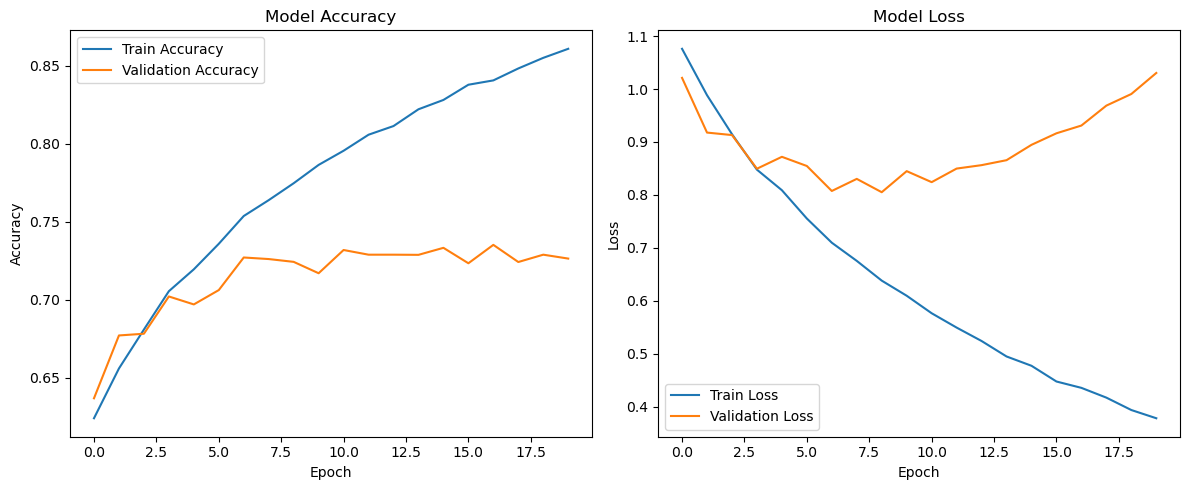

In [10]:
#7. plot Training and Validation results
# Accuracy plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


In [11]:
#8. Evaluate on Test Data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


313/313 - 2s - 6ms/step - accuracy: 0.7264 - loss: 1.0304

Test Accuracy: 72.64%
Test Loss: 1.0304


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


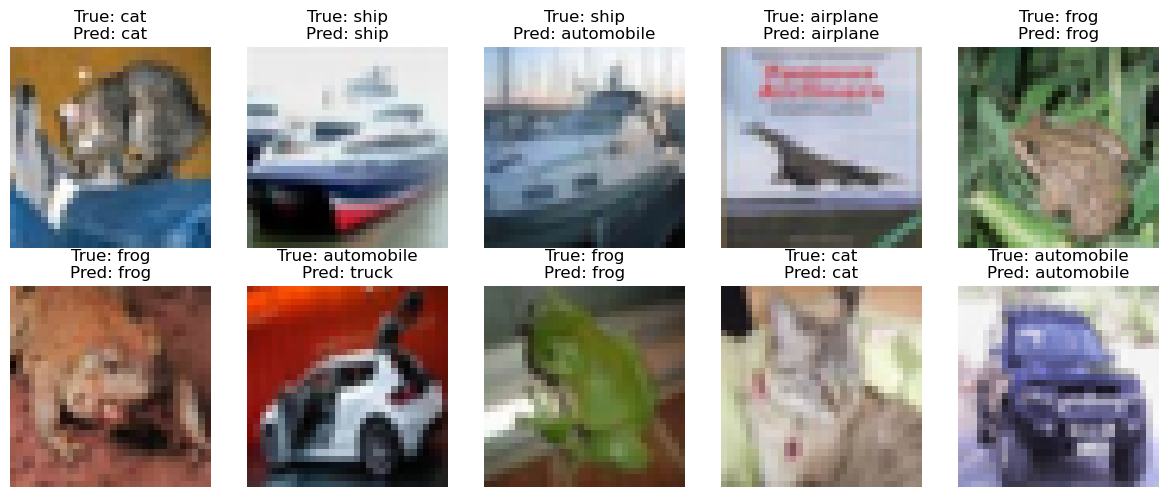

In [12]:
#9. Show Prediction on few images
# Predict on test samples
predictions = model.predict(x_test[:10])
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test[:10], axis=1)

# Plot sample predictions
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i])
    plt.title(f"True: {class_names[true_labels[i]]}\nPred: {class_names[predicted_labels[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
